
В цьому завданні ти реалізуєш різні методи вирішення систем лінійних рівнянь та порівняєш їх швидкість. Написані функції мають працювати з системами будь-якого розміру.
- Задай матрицю та вектор вільних членів для наступної системи:

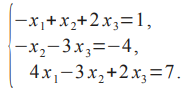


In [27]:
import numpy as np
A = np.array([[-1, 1, 2], [0, -1, -3], [4, -3, 2]])
B = np.array([1, -4, 7])


- Напиши функцію для вирішення системи матричним методом
- Напиши функцію для вирішення системи методом Крамера
- Напиши функцію для вирішення системи методом Гауса
- Прочитай систему з csv файлу за [посиланням](https://docs.google.com/spreadsheets/d/1WdYrT6ukWxm0h-5DiMF3LZPIV7kBZiLYJgfPhWY0DNM/edit#gid=0) та виріши її трьома реалізованими функціями. Зроби висновки щодо теоретичних очікувань та фактичного отриманого часу виконання. Обґрунтуй отримані результати.

In [28]:
# Напиши функцію для вирішення системи матричним методом
def solve_inv_matrix(a, b, verbose=False):
    a_inv = np.linalg.inv(a)
    x = np.dot(a_inv, b)
    return x

print(f"Вектор рішення: \r\n {solve_inv_matrix(A, B)}")

Вектор рішення: 
 [2. 1. 1.]


In [31]:
# Напиши функцію для вирішення системи методом Крамера
def solve_cramer(a, b, verbose=False):
    n = len(b)
    x = np.zeros(n)
    det_a = np.linalg.det(a)

    for i in range(n):
        a_temp = a.copy()
        a_temp[:, i] = b
        x[i] = np.linalg.det(a_temp) / det_a

    return x

print(f"Вектор рішення: \r\n {solve_cramer(A, B)}")

Вектор рішення: 
 [2. 1. 1.]


In [34]:
# Напиши функцію для вирішення системи методом Гауса
def solve_gausse(a, b, verbose=False):
    augmented_matrix = np.column_stack((a.astype(np.float64), b.astype(np.float64)))

    n = len(b)

    for i in range(n):
        if augmented_matrix[i, i] == 0:
            raise ValueError("Головний діагональний елемент не може бути нулем.")

        augmented_matrix[i, :] /= augmented_matrix[i, i]

        for j in range(i + 1, n):
            augmented_matrix[j, :] -= augmented_matrix[j, i] * augmented_matrix[i, :]

    # Етап зворотнього ходу
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = augmented_matrix[i, -1]
        for j in range(i + 1, n):
            x[i] -= augmented_matrix[i, j] * x[j]

    return x

print(f"Вектор рішення: \r\n {solve_gausse(A, B)}")

Вектор рішення: 
 [2. 1. 1.]


In [9]:
# Прочитай систему з csv файлу за посиланням та виріши її трьома реалізованими функціями.
# Опиши теоретичні очікування та фактичну різницю часу виконання. Яка, на твою думку, причина результатів, які ми бачимо?
import pandas as pd
import numpy as np

url = 'https://docs.google.com/spreadsheets/u/0/d/1WdYrT6ukWxm0h-5DiMF3LZPIV7kBZiLYJgfPhWY0DNM/edit?fromCopy=true'
url = url[:url.find('/edit')] + '/export?format=csv'

df = pd.read_csv(url)

print(df)


     x0  x1  x2  x3  x4  x5  x6  x7  x8  x9  ...  x291  x292  x293  x294  \
0     2   0   2   0   1   2   1   2   1   1  ...     2     0     1     2   
1     2   1   1   0   0   1   0   2   0   0  ...     1     1     0     0   
2     2   1   0   0   0   2   0   0   1   1  ...     1     2     2     0   
3     0   0   2   2   1   2   1   0   1   0  ...     2     0     0     1   
4     1   2   1   2   1   2   2   1   2   2  ...     2     1     1     0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   ...   ...   ...   ...   
295   2   2   1   0   0   1   0   0   0   1  ...     2     1     1     2   
296   1   2   0   2   1   0   1   0   1   0  ...     0     1     0     0   
297   2   2   1   1   1   0   2   1   2   0  ...     0     1     2     1   
298   0   0   1   1   0   1   0   2   2   1  ...     0     2     0     0   
299   1   0   2   0   0   1   2   1   1   1  ...     2     1     1     2   

     x295  x296  x297  x298  x299    b  
0       2     0     2     1     1  602  
1    

In [20]:
a = df.iloc[:, :-1].values
b = df['b'].values
print(f'B vector shape ->{b.shape}')

b_2d = b.reshape(-1, 1)
print(f'B_2D vector shape ->{b_2d.shape}')
rows, columns = b_2d.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

B vector shape ->(300,)
B_2D vector shape ->(300, 1)
Number of rows: 300
Number of columns: 1


In [38]:
%%timeit -r 2 -n 10
solve_inv_matrix(a, b)

6.2 ms ± 163 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [39]:
%%timeit -r 2 -n 10
solve_cramer(a, b)

893 ms ± 135 ms per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [40]:
%%timeit -r 2 -n 10
solve_gausse(a, b)

200 ms ± 1.87 ms per loop (mean ± std. dev. of 2 runs, 10 loops each)


## **Висновки: **

**Матричний метод** (solve_inv_matrix):
Цей метод використовує обернену матрицю для знаходження розв'язку системи.
Обчислення оберненої матриці - дорога операція, особливо для великих матриць.
Результат показує, що цей метод дуже швидкий порівняно з іншими в даному випадку.

**Метод Крамера** (solve_cramer):
Цей метод використовує формулу Крамера, яка включає обчислення детермінанту матриці.
Обчислення детермінанту також може бути дорогою операцією, особливо для великих матриць.
Результат вказує на те, що метод Крамера виявився найповільнішим серед трьох.

**Метод Гаусса** (solve_gausse):
Цей метод використовує елементарні операції для приведення матриці до верхньої трикутної форми та здійснення зворотного ходу.
Він зазвичай є ефективним для розріджених та великих матриць, але його ефективність може залежати від специфічності системи рівнянь.
Результат вказує на те, що метод Гаусса працює швидше за метод Крамера, але повільніше, ніж матричний метод.

---

*** Загалом, вибір методу для розв'язання системи лінійних рівнянь повинен залежати від конкретних умов задачі та розмірності матриці. Якщо матриця не є дуже великою і обернення можливе, то матричний метод може бути найшвидшим. В інших випадках, метод Гаусса може бути більш ефективним. Метод Крамера, зазвичай, використовується для невеликих систем рівнянь, оскільки він може бути обчислювально витратним для великих систем через необхідність обчислення детермінанту.***






